In [70]:
# Weather Data Analyzer - ARTTIFAI TECH

# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
# ✅ Step 2: Load Dataset
df = pd.read_csv("C:/Users/santa/Downloads/Weather_Data.csv")

In [72]:
# ✅ Step 3: Data Cleaning and Preprocessing

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')

# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Select relevant columns and make a copy
weather_df = df[['Date', 'Year', 'Month', 'MaxTemp', 'Humidity3pm', 'Rainfall']].copy()

# Handle missing values (mean imputation)
weather_df = weather_df.fillna(weather_df.mean(numeric_only=True))


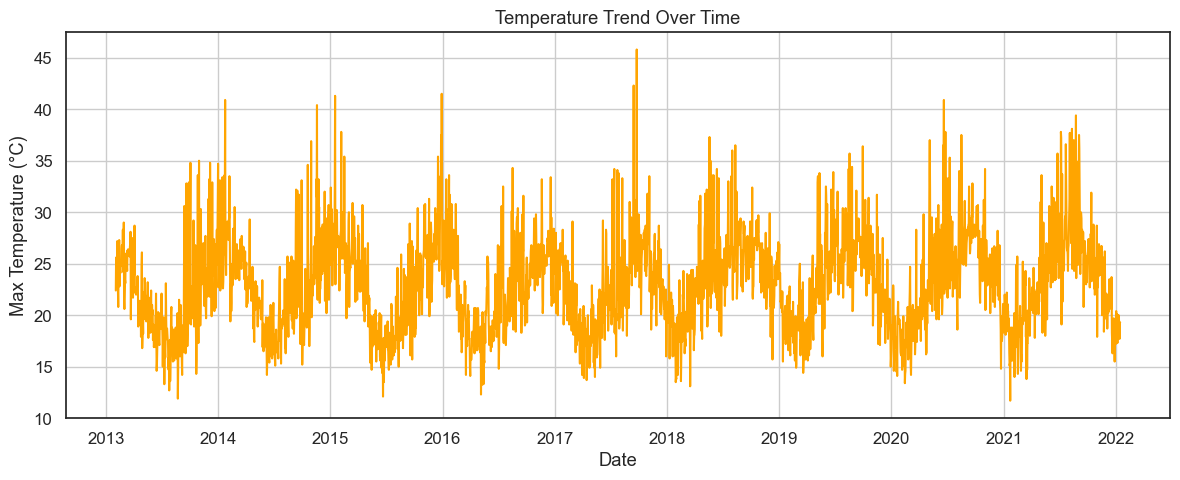

In [73]:
# ✅ Step 4: Exploratory Data Analysis (EDA)
# Line plot: Temperature trend
df_sorted = weather_df.sort_values('Date')
plt.figure(figsize=(12, 5))
plt.plot(df_sorted['Date'], df_sorted['MaxTemp'], color='orange')
plt.title("Temperature Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

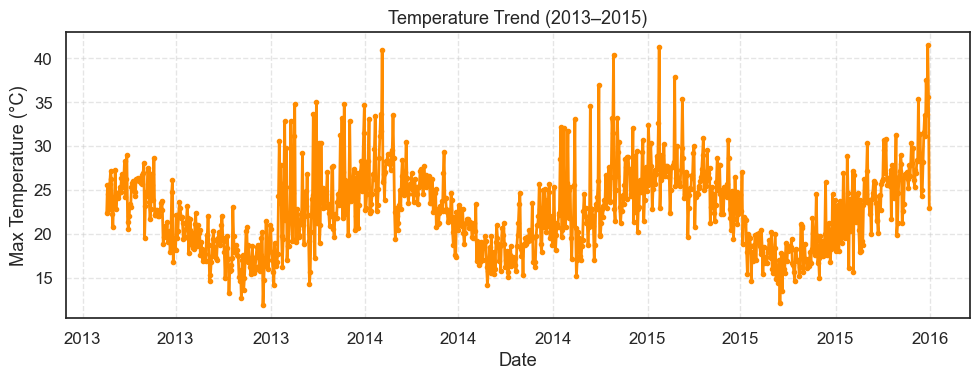

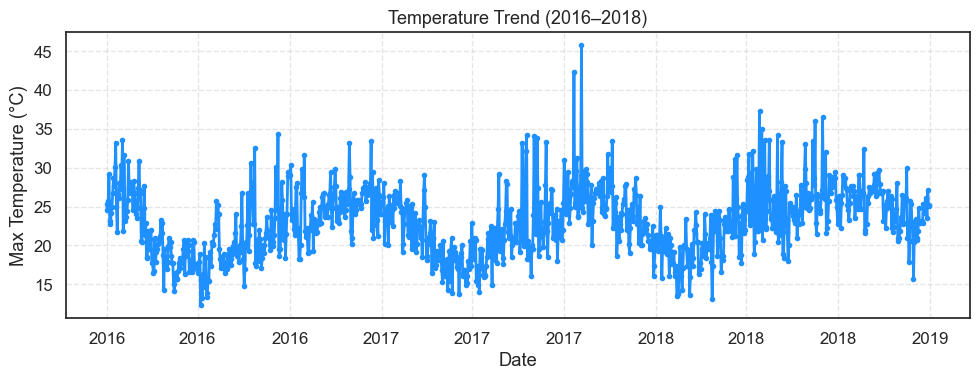

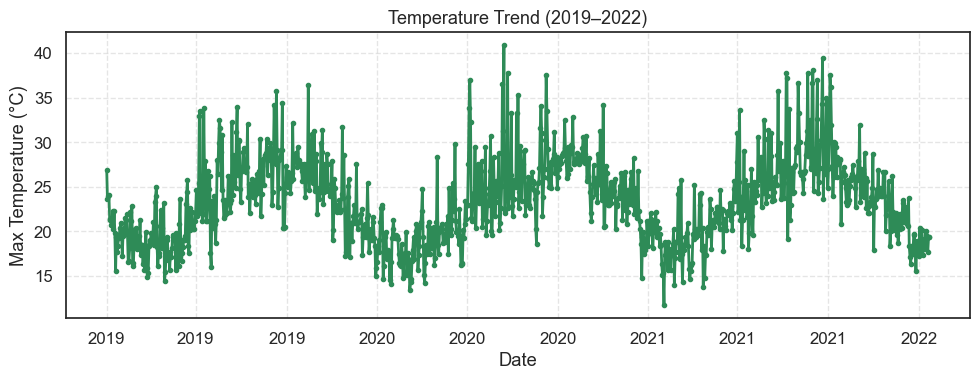

In [74]:
import matplotlib.dates as mdates

# Sort by date
df_sorted = weather_df.sort_values('Date')

# Set date formatter
date_fmt = mdates.DateFormatter('%Y')

# Chart 1: 2013–2015
subset_1 = df_sorted[(df_sorted['Year'] >= 2013) & (df_sorted['Year'] <= 2015)]
plt.figure(figsize=(10, 4))
plt.plot(subset_1['Date'], subset_1['MaxTemp'], color='darkorange', linewidth=2, marker='o', markersize=3)
plt.title("Temperature Trend (2013–2015)", fontsize=13)
plt.xlabel("Date")
plt.ylabel("Max Temperature (°C)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().xaxis.set_major_formatter(date_fmt)
plt.tight_layout()
plt.show()

# Chart 2: 2016–2018
subset_2 = df_sorted[(df_sorted['Year'] >= 2016) & (df_sorted['Year'] <= 2018)]
plt.figure(figsize=(10, 4))
plt.plot(subset_2['Date'], subset_2['MaxTemp'], color='dodgerblue', linewidth=2, marker='o', markersize=3)
plt.title("Temperature Trend (2016–2018)", fontsize=13)
plt.xlabel("Date")
plt.ylabel("Max Temperature (°C)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().xaxis.set_major_formatter(date_fmt)
plt.tight_layout()
plt.show()

# Chart 3: 2019–2022
subset_3 = df_sorted[(df_sorted['Year'] >= 2019) & (df_sorted['Year'] <= 2022)]
plt.figure(figsize=(10, 4))
plt.plot(subset_3['Date'], subset_3['MaxTemp'], color='seagreen', linewidth=2, marker='o', markersize=3)
plt.title("Temperature Trend (2019–2022)", fontsize=13)
plt.xlabel("Date")
plt.ylabel("Max Temperature (°C)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().xaxis.set_major_formatter(date_fmt)
plt.tight_layout()
plt.show()


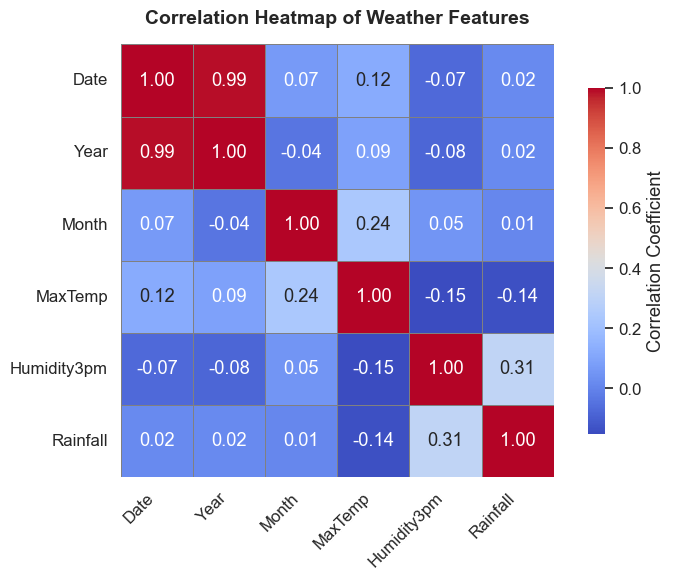

In [75]:
# ✅ Step 5: Compute correlation matrix (rounded for readability)
# Heatmap
corr_matrix = weather_df.corr().round(2)

# Set up the plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.1)
sns.set_style("white")

# Create heatmap
heatmap = sns.heatmap(corr_matrix,
                      annot=True,
                      fmt=".2f",
                      cmap="coolwarm",
                      linewidths=0.5,
                      linecolor='gray',
                      square=True,
                      cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})

# Titles and labels
plt.title("Correlation Heatmap of Weather Features", fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


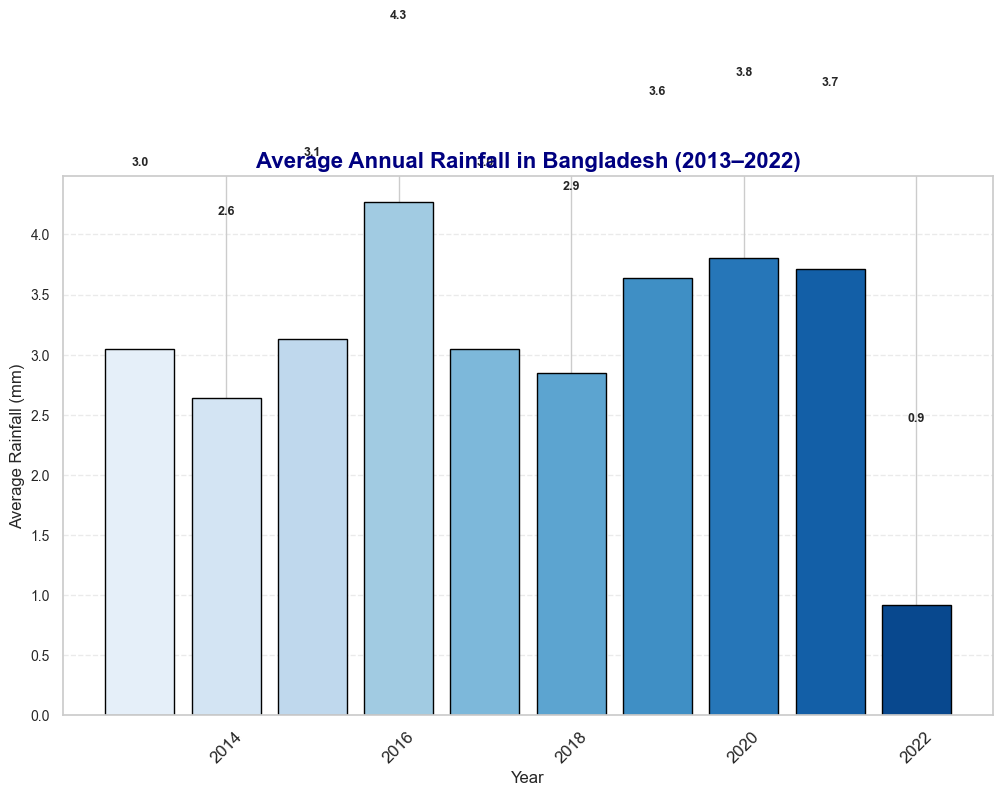

In [76]:
# ✅ Step 6: rainfall comparison 
# Bar Graph
# Set font (Arial is common and clean)
plt.rcParams['font.family'] = 'Arial'

# Prepare data
rainfall_by_year = weather_df.groupby('Year')['Rainfall'].mean().round(2)
rainfall_by_year = rainfall_by_year.sort_index()

# Create the plot
plt.figure(figsize=(12, 7))  # Increased height for layout
sns.set_style("whitegrid")

# Gradient blue bars
colors = sns.color_palette("Blues", len(rainfall_by_year))
bars = plt.bar(rainfall_by_year.index, rainfall_by_year.values, color=colors, edgecolor='black')

# Add value labels on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1.5, f'{height:.1f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Titles and labels
plt.title("Average Annual Rainfall in Bangladesh (2013–2022)", fontsize=16, fontweight='bold', color='navy')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Rainfall (mm)", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

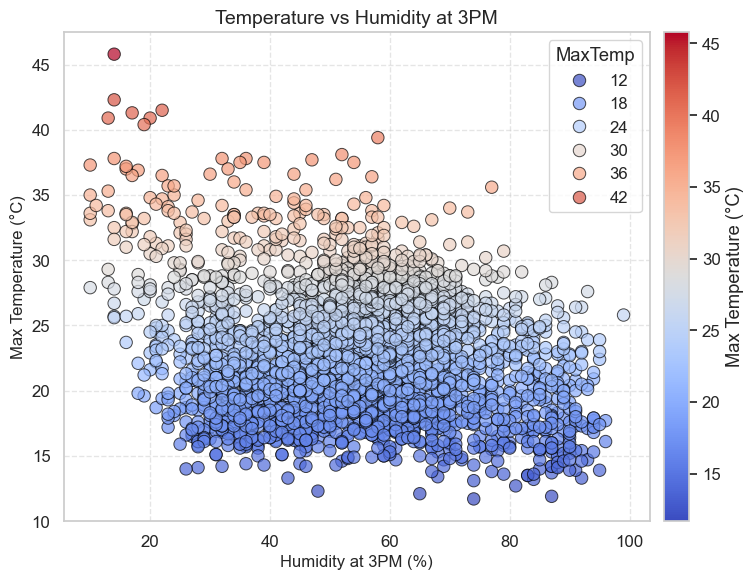

In [77]:
# ✅ Step 7: Humidity and Temperature
# Scatter Plot: A graphical relationship between humidity and temperature
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create the scatter plot and capture the return object
scatter = sns.scatterplot(
    x='Humidity3pm', 
    y='MaxTemp', 
    data=weather_df,
    hue='MaxTemp', 
    palette='coolwarm',
    edgecolor='black',
    alpha=0.7,
    s=80
)

# Add colorbar from scatterplot's collections
norm = plt.Normalize(weather_df['MaxTemp'].min(), weather_df['MaxTemp'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])

# Attach the colorbar to the current figure and axis
cbar = plt.colorbar(sm, ax=scatter, pad=0.02)
cbar.set_label('Max Temperature (°C)')

# Add labels and grid
plt.title("Temperature vs Humidity at 3PM", fontsize=14)
plt.xlabel("Humidity at 3PM (%)", fontsize=12)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [78]:
# ✅ Step 8: Predictive Modeling (Linear Regression)
features = weather_df[['Year', 'Month']]
target = weather_df['MaxTemp']

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 19.28
Root Mean Squared Error (RMSE): 4.39
R^2 Score: 0.05



Actual vs Predicted Temperature Differences:
   Actual MaxTemp  Predicted MaxTemp  Difference
0            21.3              23.48       -2.18
1            15.3              22.17       -6.87
2            26.1              21.38        4.72
3            14.8              22.81       -8.01
4            16.7              22.04       -5.34
5            24.8              24.28        0.52
6            25.0              23.96        1.04
7            20.4              22.56       -2.16
8            20.1              22.02       -1.92
9            27.6              23.77        3.83


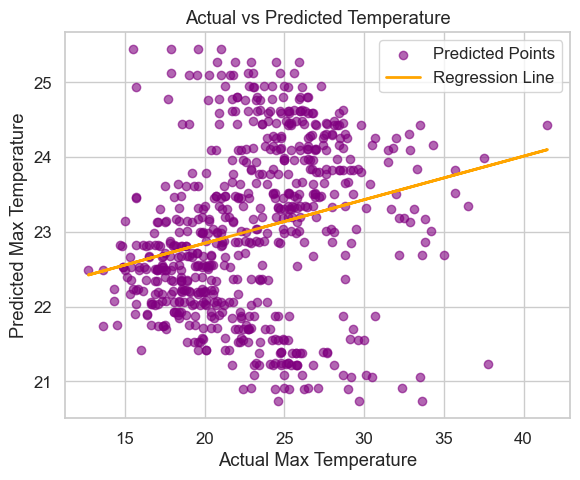

In [84]:
# ✅ Step 9:  Temperature Prediction Graph
# A Linear Regression model forecasting future temperature changes, visualized in an orange trend line
results_df = pd.DataFrame({
    'Actual MaxTemp': y_test.values,
    'Predicted MaxTemp': y_pred,
    'Difference': y_test.values - y_pred
}).round(2)

print("\nActual vs Predicted Temperature Differences:")
print(results_df.head(10))

# Fit a Linear Regression model between actual and predicted
reg_line_model = LinearRegression()
X_vals = np.array(y_test).reshape(-1, 1)  # Actual values as input
y_vals = np.array(y_pred)  # Predicted values as target
reg_line_model.fit(X_vals, y_vals)

# Predict trend line
line_preds = reg_line_model.predict(X_vals)

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple', label="Predicted Points")
plt.plot(y_test, line_preds, color='orange', linewidth=2, label="Regression Line")

plt.xlabel("Actual Max Temperature")
plt.ylabel("Predicted Max Temperature")
plt.title("Actual vs Predicted Temperature")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

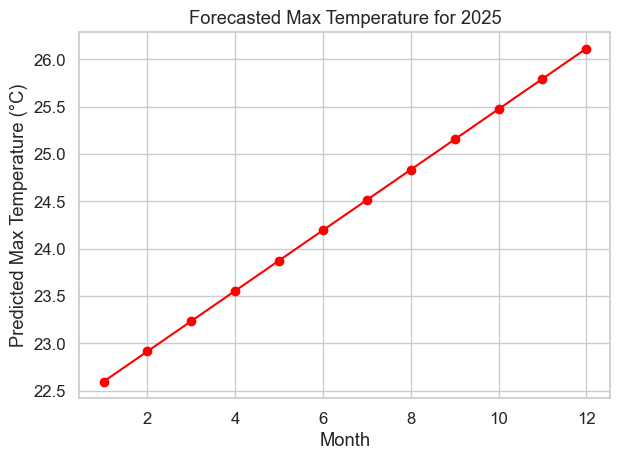

In [85]:
# Forecasting Trend Line (Month-wise average prediction)
predicted_year = 2025
forecast_months = pd.DataFrame({
    'Year': [predicted_year]*12,
    'Month': list(range(1, 13))
})
forecast_scaled = scaler.transform(forecast_months)
forecast_temps = model.predict(forecast_scaled)

plt.plot(range(1, 13), forecast_temps, marker='o', color='red')
plt.title(f"Forecasted Max Temperature for {predicted_year}")
plt.xlabel("Month")
plt.ylabel("Predicted Max Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [86]:
# ✅ Step 10: Statistical Summary
# Key Climate Insights
print("\n🌦️ Statistical Summary of Weather Data:\n")
print(weather_df[['MaxTemp', 'Humidity3pm', 'Rainfall']].describe().round(2))

# Additional Insights
print("\n📊 Additional Insights:")
print(f"Maximum Recorded Temperature: {weather_df['MaxTemp'].max():.2f} °C")
print(f"Minimum Recorded Temperature: {weather_df['MaxTemp'].min():.2f} °C")
print(f"Total Rainfall Recorded: {weather_df['Rainfall'].sum():.2f} mm")
print(f"Average Monthly Humidity at 3PM: {weather_df['Humidity3pm'].mean():.2f} %")


🌦️ Statistical Summary of Weather Data:

       MaxTemp  Humidity3pm  Rainfall
count  3271.00      3271.00   3271.00
mean     23.01        54.70      3.34
std       4.48        16.28      9.92
min      11.70        10.00      0.00
25%      19.60        44.00      0.00
50%      22.80        56.00      0.00
75%      26.00        64.00      1.40
max      45.80        99.00    119.40

📊 Additional Insights:
Maximum Recorded Temperature: 45.80 °C
Minimum Recorded Temperature: 11.70 °C
Total Rainfall Recorded: 10932.20 mm
Average Monthly Humidity at 3PM: 54.70 %
